In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121

In [2]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add a new top layer for classification
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(21, activation='softmax')(x)

NameError: name 'DenseNet121' is not defined

In [4]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up the data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(r'C:\Users\MANAN\Downloads\train', target_size=(224, 224), batch_size=32, class_mode='categorical',shuffle=False)
val_generator = test_datagen.flow_from_directory(r'C:\Users\MANAN\Downloads\validation', target_size=(224, 224), batch_size=32, class_mode='categorical',shuffle=False)

# Train the model
my_model=model.fit(train_generator, epochs=15, validation_data=val_generator)

Found 7350 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.
Epoch 1/15
230/230 [==============================] - 1853s 8s/step - loss: 2.3666 - accuracy: 0.3569 - val_loss: 1.1067 - val_accuracy: 0.6086
Epoch 2/15
230/230 [==============================] - 1590s 7s/step - loss: 0.9776 - accuracy: 0.6776 - val_loss: 0.6342 - val_accuracy: 0.7848
Epoch 3/15
230/230 [==============================] - 1525s 7s/step - loss: 0.6563 - accuracy: 0.7790 - val_loss: 0.5395 - val_accuracy: 0.8138
Epoch 4/15
230/230 [==============================] - 1656s 7s/step - loss: 0.5753 - accuracy: 0.8003 - val_loss: 0.4263 - val_accuracy: 0.8457
Epoch 5/15
230/230 [==============================] - 1822s 8s/step - loss: 0.4445 - accuracy: 0.8449 - val_loss: 0.4110 - val_accuracy: 0.8619
Epoch 6/15
230/230 [==============================] - 1611s 7s/step - loss: 0.4555 - accuracy: 0.8392 - val_loss: 0.5274 - val_accuracy: 0.8333
Epoch 7/15
230/230 [==============================

In [5]:
model.save('my_model.h5')

In [6]:
test_dataset = r'C:\Users\MANAN\Downloads\test'
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=32,
                                                 target_size = (256,256),
                                                 class_mode='categorical')

Found 1050 images belonging to 21 classes.


In [7]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=32)

33/33 [==============================] - 213s 7s/step - loss: 0.2337 - accuracy: 0.9124


In [8]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.23373252153396606
Test Accuracy: 0.9123809337615967


In [9]:
class_label=list(train_generator.class_indices.keys())

In [4]:
from keras.models import load_model
load_model('my_model.h5')

In [5]:
import numpy as np
my_model.evaluate(test_generator)
preds = my_model.predict(test_generator)
y_preds = np.argmax(preds , axis = 1 )
y_test = np.array(test_generator.labels)

NameError: name 'my_model' is not defined

In [23]:
from sklearn.metrics import precision_score
print('Precision: %.3f' % precision_score(y_test, y_preds,average='micro'))

Precision: 0.912


In [24]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, y_preds,average='micro'))

Recall: 0.912


In [25]:
from sklearn.metrics import f1_score
print('F1 Score: %.3f' % f1_score(y_test, y_preds,average='micro'))

F1 Score: 0.912


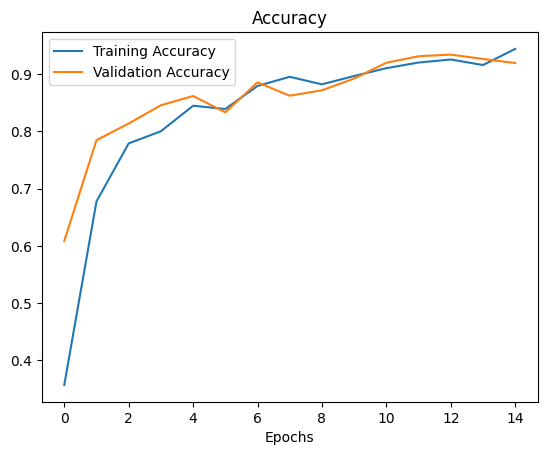

In [33]:
import matplotlib.pyplot as plt
loss = my_model.history['loss']
val_loss = my_model.history['val_loss']  
accuracy = my_model.history['accuracy']
val_accuracy = my_model.history['val_accuracy']
epochs = range(len(my_model.history['loss']))
plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [36]:
history_dict = my_model.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
